# TocoPatch Alt Detect UC

Uses alternative UC waveform extractor with increased outlier rejection


Below are some of the recordings showing clear uterine contraction patterns. I'll add more recordings. Some of the recordings are causing the tool to close automatically such as August 15 pt D.

## Malawi_ctg_db

- October 1, pt B
- October 2, pt A
- October 5, pt C - 8.9mins

## Recordings from Malawi_ctg_db_user2

- August 6, pt A - 18.7 mins
- August 6, pt A - 34.3 mins
- August 6, pt B
- August 8, pt C 10.3 mins 5:02:48
- August 9, pt A - 30.3 mins
- August 9, pt F
- August 14 pt D (contractions at 3 - 5, 11 - 13.5, 20 - 22, 25 - 28)
- August 15, pt A
- August 15 pt E (contractions at 4 - 6, 9 - 11, 13 - 15 mild , 19 - 21)
- October 4 pt A (contractions at 3 - 4.5, 6 - 8, 13 - 15.5, 17.5 - 19.5)
- October 4 pt B (contractions at  7 - 10, 14 - 16, 20 -22)

# Configuration

### Select PC or Mac
usePc:
    
- True: Uses Windows Surface Pro
- False:  Uses Mac (Doug's  development Laptop)

In [1]:
usePc = True

### Recording set to use

use_user_2:
- False:  Uses Malawi_ctg_db     (Monica's User 1 dataset)
- True: Malawi_ctg_db_user2      (Monica's User 2 dataset)

In [2]:
use_user_2 = True

###### Apply configuration to paths (update only if paths change)

In [3]:
if usePc:
    if use_user_2:
        path = 'c:\Users\Dtree\Documents\ctg_db'
    else:
        path = 'c:\Users\Dtree\Documents\ctg_db'
else:
    if use_user_2:
        path = '/Users/doug/Documents/GitHub/Malawi_ctg_db_user2'
    else:
        path = '/Users/doug/Documents/GitHub/Malawi_ctg_db'

###### Apply configuration to source code directory  (update only if paths change)

In [4]:
import sys
if usePc:
    sys.path.append('c:\Users\Dtree\Documents\GitHub\CTG\CombinedRecorder')
else:
    sys.path.append('/Users/doug/Documents/GitHub/LowCostCTG/CombinedRecorder')

# Selected Recordings

### Definitions for Malawi_ctg_db

In [5]:
SelectedRecordings1 = {
    # October 1, pt B
    '56f7347d-dd4c-4839-a386-e1d3a8966fd7':
        ['453c1a42-3135-4750-b0b7-7af96da035cf'],
    # October 2, pt A
    'e4e29966-ee72-4bf1-b32e-05232fa50936':
        ['5a3ec7c4-ea90-40dd-a222-8d0758b78276'],
    # October 5, pt C - 8.9mins
    'f65f75a5-2c68-4bd0-9f85-2d2fbc5b5db5':
        ['c0a0c86c-e059-4383-94ee-ec0ee9fa52d6'],
}

### Definitions for Malawi_ctg_db_user2

In [6]:
SelectedRecordings2 = {
    # August 6, pt A - 18.7 mins
    '05de685b-e73e-4ada-9a49-b29aa81a4d37':
        ['b03cea74-32b9-4135-afda-b1dac1fe03f6'],
    
    # August 6, pt A - 34.3 mins
    '05de685b-e73e-4ada-9a49-b29aa81a4d37':
         ['bbe8443e-90f2-4c6f-88ae-93b0789fdba7'],
    
    # August 6, pt B
    '7eb554ab-fc04-460b-b388-8bfbe1a387fc':
        ['7eb554ab-fc04-460b-b388-8bfbe1a387fc'],
    
    # August 8, pt C 10.3 mins 5:02:48
    '57ba7581-81d0-4601-b884-9139fcd98890':
        ['3cef2dd2-96af-4af4-a816-7cd92841a880'],
    
    # August 9, pt A - 30.3 mins
    '906d2e3f-e391-4cbf-a324-4afdfd917574':
        ['668a744e-65a0-49b5-abd9-ede5741f48df'],
    
    # August 9, pt F
    '3331a782-3057-401c-9c6a-2e0feb7abef2':
        ['d2b5181b-8f79-4b5d-b7c6-1783510ff643'],
    
    # August 14 pt D
    '0e01d1dd-c60b-4a0b-b1f7-4b4bb0a6adb4':
        ['54976ba0-228e-435a-8d28-9265984d1379'],
    
    # August 15, pt A
    '091a24e2-e069-4b01-a11c-e534c8cd29ab':
       ['c74e5801-59dc-4a38-b86f-fcb603f2a04f'],
    
    # August 15 pt E
    '5fce3c21-9375-4f5c-b249-875fac0fd6d8':
        ['ddcc6b5b-4933-48a2-9bbd-241e21aeaa40'],
    
    # October 4 pt A
    '6e688613-e966-458b-8583-5055b2f98634':
        ['3761b754-70d2-4a47-a897-3519daa4632f'],
    
    # October 4 pt B
    '135da2bb-0d36-4810-b3f8-ffbc76a43fcf':
        ['ab0fb7c2-dee1-48d6-ba48-2faf23f116b3'],
    }

###### Select which set of recording to use based on confguration

In [7]:
if use_user_2:
    SelectedRecordings = SelectedRecordings2
else:
    SelectedRecordings = SelectedRecordings1

# Imports

In [8]:
from display_selected_uc_recordings import showAnnotatedPlot, showAllContractions

In [9]:
from libFilterUC import PARAMS_FILTER_UC

# Default Settings for UC Filter

In [10]:
PARAMS_FILTER_UC

{'maxWidth': 78.0,
 'minThresh': None,
 'minWidth': 35,
 'squelchFactor': 4,
 'squelchPercentile': 20}

# Analysis

### Show filtered decels

Filter parameters include:
- squelchPercentile:  Signal percentile value used as noise threshold (0-100) [dashed ble lne]
- squelchFactor:  Multiple of noise threshold used to define mininum maagnitude for UC Acme [cashed red line]
- minThresh: User specified minimum magnitude (None means no absolution threshold)
- minWidth: minimum width of contraction (as measured from half of peak magnitude)
- maxWidth: Maximum width of contraction

Alternative extractor params:
- pct: instantaneous signal percentile value to use as basis ov waveform (default: 40)
- width: segment width in seconds.  Must be integer.  (default: 25)
- freq:  frequency of UC waveform smoothing filter (default:  1.0/50)

note: extractor enabled with 'useAltExtractor=True,'


kwargs: {'minWidth': 35, 'verbose': False, 'maxWidth': 78.0}
----------------------------------------
august 14, 2018 -- pt d :
0e01d1dd-c60b-4a0b-b1f7-4b4bb0a6adb4/54976ba0-228e-435a-8d28-9265984d1379.p
['pos', 'raw', 'uc', 'filtered', 'posMin', 'alt_uc']


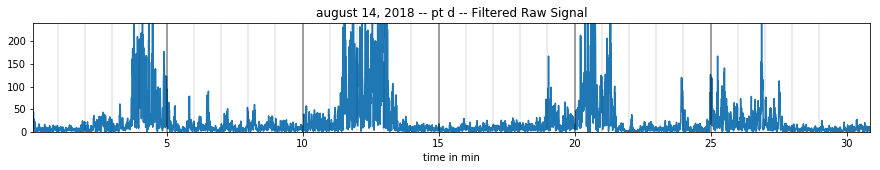

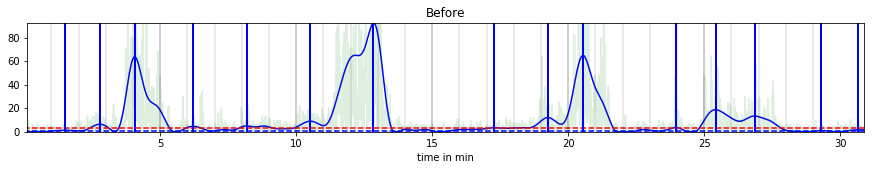

Filtering on spacing and magnitude
Initial:
uc @  1.5   1.0- 2.0   width:   58 mag: 1.30
uc @  2.8   2.4- 3.1   width:   42 mag: 6.42
uc @  4.1   3.7- 4.5   width:   45 mag: 63.72
uc @  6.2   5.9- 6.6   width:   44 mag: 4.58
uc @  8.2   7.8-13.5   width:  342 mag: 4.99
uc @ 10.5  10.0-13.5   width:  206 mag: 9.01
uc @ 12.8  11.7-13.2   width:   90 mag: 92.34
uc @ 17.3  15.9-21.7   width:  348 mag: 3.50
uc @ 19.3  18.8-21.6   width:  166 mag: 12.10
uc @ 20.6  20.2-21.1   width:   57 mag: 64.92
uc @ 24.0  23.6-24.2   width:   35 mag: 3.58
uc @ 25.4  25.0-26.2   width:   73 mag: 18.79
uc @ 26.9  24.9-27.6   width:  161 mag: 13.40
uc @ 29.3  29.0-29.6   width:   31 mag: 1.06
uc @ 30.7  30.3-30.9   width:   36 mag: 1.64

    sustained uc @ 12.8m  width: 90 sec

Final:
uc @  2.8   2.4- 3.1   width:   42 mag: 6.42
uc @  4.1   3.7- 4.5   width:   45 mag: 63.72
uc @  6.2   5.9- 6.6   width:   44 mag: 4.58
uc @ 12.8  11.7-13.2   width:   90 mag: 92.34
uc @ 20.6  20.2-21.1   width:   57 mag: 64.9

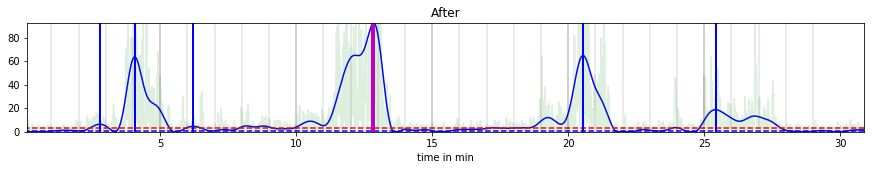

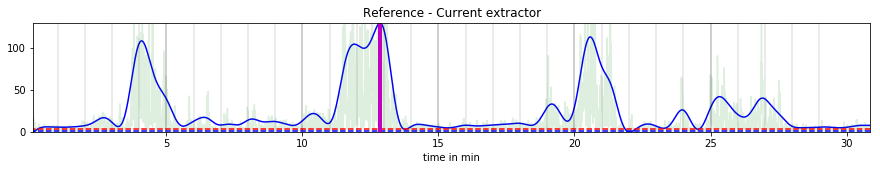


****************************************

----------------------------------------
august 6, 2018 -- pt a :
05de685b-e73e-4ada-9a49-b29aa81a4d37/bbe8443e-90f2-4c6f-88ae-93b0789fdba7.p
['pos', 'raw', 'uc', 'filtered', 'posMin', 'alt_uc']


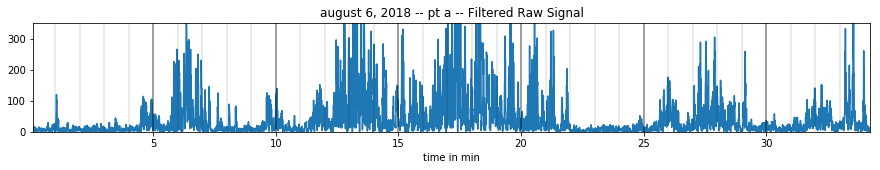

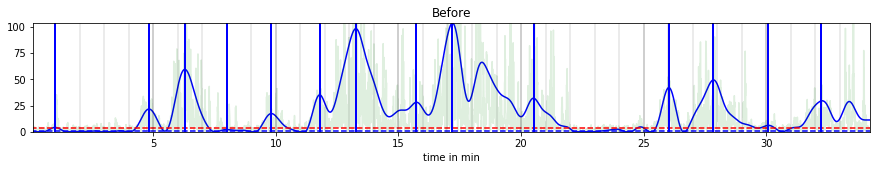

Filtering on spacing and magnitude
Initial:
uc @  1.0   0.7- 1.2   width:   30 mag: 4.13
uc @  4.8   4.5- 5.2   width:   42 mag: 21.72
uc @  6.3   5.9- 6.8   width:   54 mag: 59.52
uc @  8.0   7.7- 8.8   width:   64 mag: 2.11
uc @  9.8   9.5-10.2   width:   45 mag: 17.40
uc @ 11.8  11.5-14.5   width:  178 mag: 35.23
uc @ 13.3  12.6-14.0   width:   81 mag: 98.40
uc @ 15.7  11.4-21.3   width:  589 mag: 28.16
uc @ 17.2  16.7-17.6   width:   57 mag: 103.66
uc @ 20.5  20.1-21.2   width:   65 mag: 32.04
uc @ 26.0  25.7-26.3   width:   37 mag: 42.20
uc @ 27.8  27.3-28.3   width:   63 mag: 49.45
uc @ 30.1  26.8-30.4   width:  216 mag: 6.13
uc @ 32.3  31.7-32.7   width:   60 mag: 29.48

    sustained uc @ 13.3m  width: 81 sec

Final:
uc @  4.8   4.5- 5.2   width:   42 mag: 21.72
uc @  6.3   5.9- 6.8   width:   54 mag: 59.52
uc @  9.8   9.5-10.2   width:   45 mag: 17.40
uc @ 13.3  12.6-14.0   width:   81 mag: 98.40
uc @ 17.2  16.7-17.6   width:   57 mag: 103.66
uc @ 20.5  20.1-21.2   width:   65

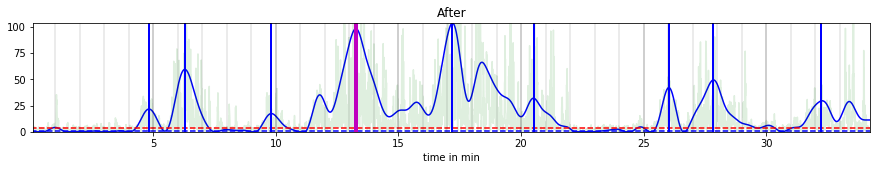

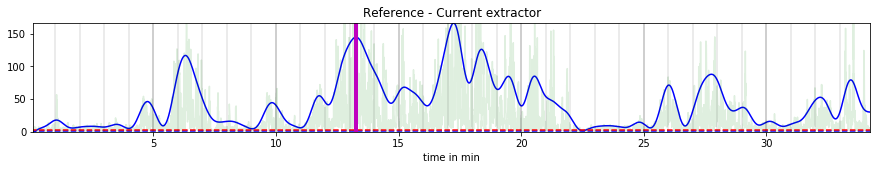


****************************************

----------------------------------------
august 15 2018 -- pt e :
5fce3c21-9375-4f5c-b249-875fac0fd6d8/ddcc6b5b-4933-48a2-9bbd-241e21aeaa40.p
['pos', 'raw', 'uc', 'filtered', 'posMin', 'alt_uc']


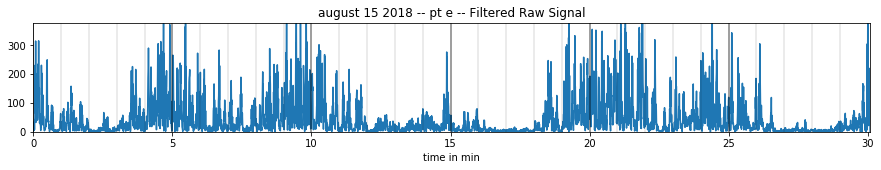

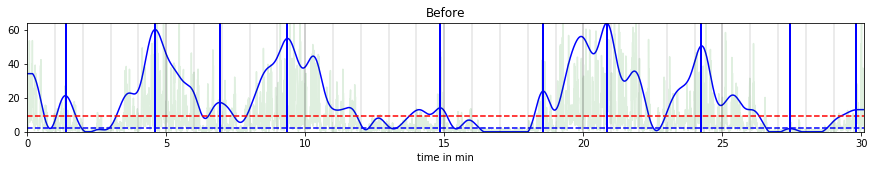

Filtering on spacing and magnitude
Initial:
uc @  1.4   1.1- 1.7   width:   39 mag: 21.38
uc @  4.6   4.1- 5.6   width:   89 mag: 60.46
uc @  6.9   6.5- 7.5   width:   59 mag: 17.28
uc @  9.4   8.3-10.6   width:  139 mag: 55.21
uc @ 14.8  13.6-15.2   width:   94 mag: 14.15
uc @ 18.6  18.3-22.3   width:  243 mag: 24.05
uc @ 20.8  19.3-21.4   width:  121 mag: 64.28
uc @ 24.2  23.5-24.7   width:   73 mag: 50.80
uc @ 27.4  27.2-27.7   width:   29 mag: 1.86
uc @ 29.8  29.0-30.1   width:   64 mag: 13.05

    sustained uc @  4.6m  width: 89 sec
    sustained uc @  9.4m  width: 139 sec
    sustained uc @ 14.8m  width: 94 sec
    sustained uc @ 20.8m  width: 121 sec

Final:
uc @  1.4   1.1- 1.7   width:   39 mag: 21.38
uc @  4.6   4.1- 5.6   width:   89 mag: 60.46
uc @  6.9   6.5- 7.5   width:   59 mag: 17.28
uc @  9.4   8.3-10.6   width:  139 mag: 55.21
uc @ 14.8  13.6-15.2   width:   94 mag: 14.15
uc @ 20.8  19.3-21.4   width:  121 mag: 64.28
uc @ 24.2  23.5-24.7   width:   73 mag: 50.80
uc @

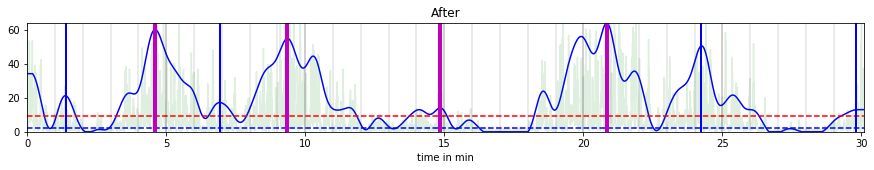

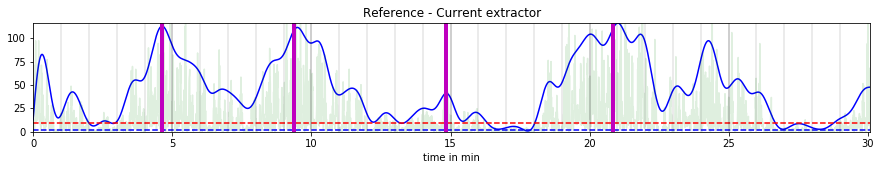


****************************************

----------------------------------------
october 4, 2018 -- pt b :
135da2bb-0d36-4810-b3f8-ffbc76a43fcf/ab0fb7c2-dee1-48d6-ba48-2faf23f116b3.p
['pos', 'raw', 'uc', 'filtered', 'posMin', 'alt_uc']


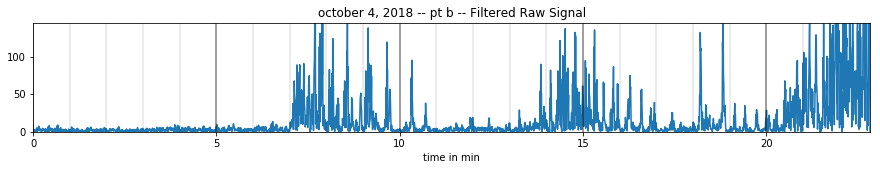

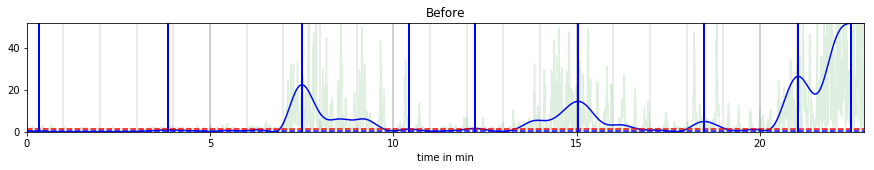

Filtering on spacing and magnitude
Initial:
uc @  0.3   0.0- 0.5   width:   32 mag: 0.37
uc @  3.8   3.4- 4.6   width:   73 mag: 0.98
uc @  7.5   7.2- 7.9   width:   46 mag: 22.38
uc @ 10.4  10.1-10.8   width:   43 mag: 1.28
uc @ 12.2  11.8-12.6   width:   49 mag: 1.58
uc @ 15.0  14.4-15.5   width:   66 mag: 14.48
uc @ 18.5  18.1-18.9   width:   48 mag: 4.90
uc @ 21.1  20.6-22.8   width:  132 mag: 26.39
uc @ 22.5  21.8-22.8   width:   64 mag: 51.72


Final:
uc @  7.5   7.2- 7.9   width:   46 mag: 22.38
uc @ 10.4  10.1-10.8   width:   43 mag: 1.28
uc @ 12.2  11.8-12.6   width:   49 mag: 1.58
uc @ 15.0  14.4-15.5   width:   66 mag: 14.48
uc @ 18.5  18.1-18.9   width:   48 mag: 4.90
uc @ 22.5  21.8-22.8   width:   64 mag: 51.72



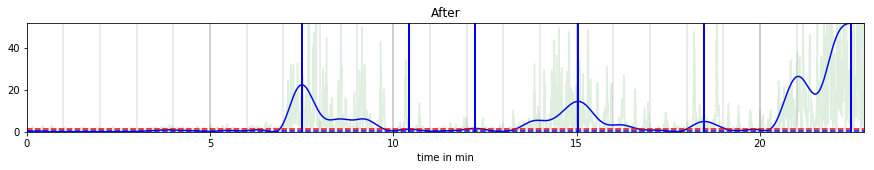

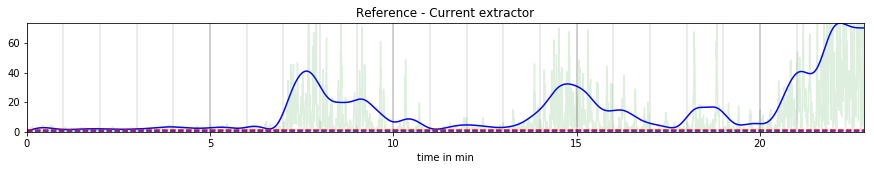


****************************************

----------------------------------------
august 9, 2018 -- pt f :
3331a782-3057-401c-9c6a-2e0feb7abef2/d2b5181b-8f79-4b5d-b7c6-1783510ff643.p
['pos', 'raw', 'uc', 'filtered', 'posMin', 'alt_uc']


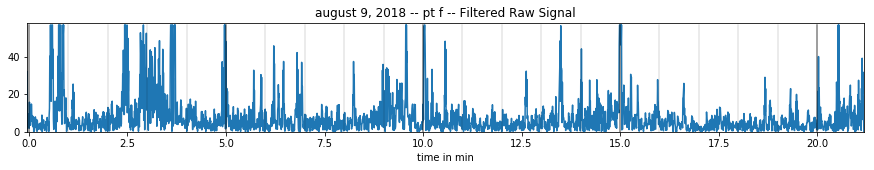

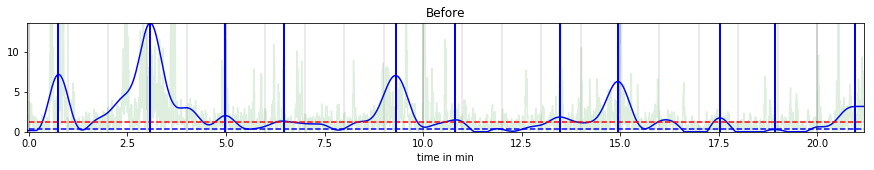

Filtering on spacing and magnitude
Initial:
uc @  0.7   0.5- 1.0   width:   33 mag: 7.15
uc @  3.1   2.7- 3.5   width:   47 mag: 13.54
uc @  5.0   4.7- 5.3   width:   38 mag: 2.02
uc @  6.5   6.0- 7.6   width:   96 mag: 1.33
uc @  9.3   8.9- 9.7   width:   45 mag: 7.02
uc @ 10.8  10.2-11.1   width:   56 mag: 1.49
uc @ 13.5  13.0-15.5   width:  146 mag: 1.84
uc @ 14.9  14.6-15.3   width:   42 mag: 6.27
uc @ 17.5  17.3-17.8   width:   28 mag: 1.73
uc @ 18.9  18.7-19.1   width:   25 mag: 0.29
uc @ 21.0  20.5-21.2   width:   41 mag: 3.16

    sustained uc @  6.5m  width: 96 sec

Final:
uc @  3.1   2.7- 3.5   width:   47 mag: 13.54
uc @  5.0   4.7- 5.3   width:   38 mag: 2.02
uc @  6.5   6.0- 7.6   width:   96 mag: 1.33
uc @  9.3   8.9- 9.7   width:   45 mag: 7.02
uc @ 10.8  10.2-11.1   width:   56 mag: 1.49
uc @ 14.9  14.6-15.3   width:   42 mag: 6.27
uc @ 21.0  20.5-21.2   width:   41 mag: 3.16



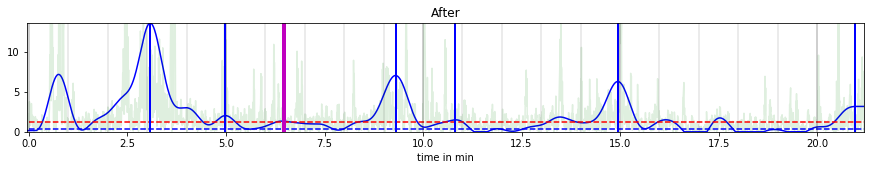

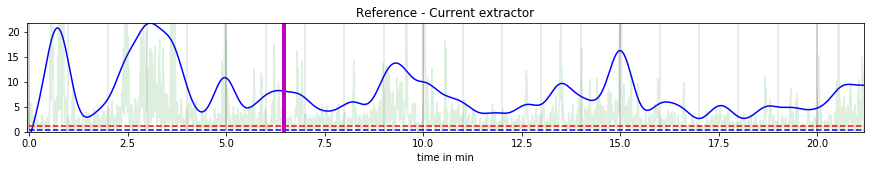


****************************************

----------------------------------------
october 4, 2018 -- pt a :
6e688613-e966-458b-8583-5055b2f98634/3761b754-70d2-4a47-a897-3519daa4632f.p
['pos', 'raw', 'uc', 'filtered', 'posMin', 'alt_uc']


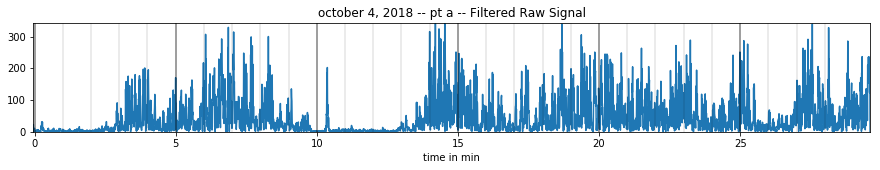

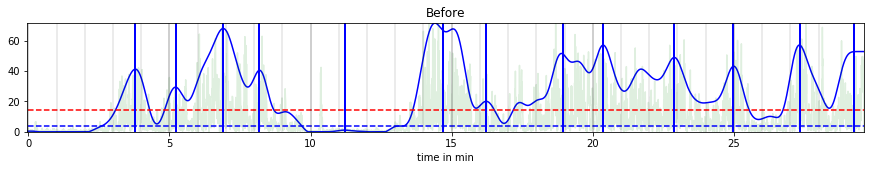

Filtering on spacing and magnitude
Initial:
uc @  3.8   3.2- 4.2   width:   59 mag: 41.27
uc @  5.2   4.8- 8.7   width:  232 mag: 29.43
uc @  6.9   6.0- 7.6   width:   95 mag: 68.09
uc @  8.2   4.9- 8.6   width:  219 mag: 40.55
uc @ 11.2  10.9-11.6   width:   39 mag: 1.10
uc @ 14.7  13.8-15.5   width:  102 mag: 66.91
uc @ 16.2  13.5-16.6   width:  185 mag: 20.09
uc @ 18.9  18.4-23.5   width:  305 mag: 51.31
uc @ 20.4  18.4-21.0   width:  153 mag: 57.14
uc @ 22.9  18.4-23.5   width:  309 mag: 49.01
uc @ 25.0  24.4-25.4   width:   59 mag: 43.22
uc @ 27.3  26.9-28.0   width:   65 mag: 57.19
uc @ 29.3  28.6-29.6   width:   58 mag: 52.86

    sustained uc @  6.9m  width: 95 sec
    sustained uc @ 14.7m  width: 102 sec
    sustained uc @ 20.4m  width: 153 sec

Final:
uc @  3.8   3.2- 4.2   width:   59 mag: 41.27
uc @  6.9   6.0- 7.6   width:   95 mag: 68.09
uc @ 14.7  13.8-15.5   width:  102 mag: 66.91
uc @ 20.4  18.4-21.0   width:  153 mag: 57.14
uc @ 25.0  24.4-25.4   width:   59 mag: 43.2

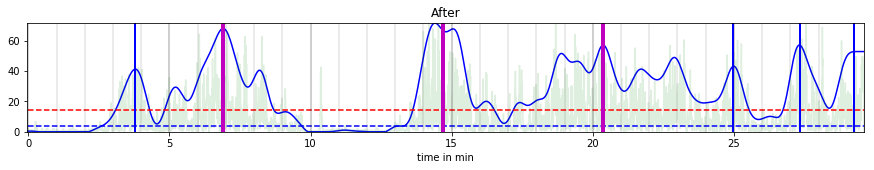

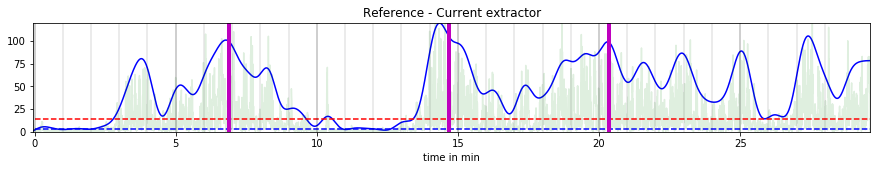


****************************************

----------------------------------------
august 9, 2018 -- pt a :
906d2e3f-e391-4cbf-a324-4afdfd917574/668a744e-65a0-49b5-abd9-ede5741f48df.p
['pos', 'raw', 'uc', 'filtered', 'posMin', 'alt_uc']


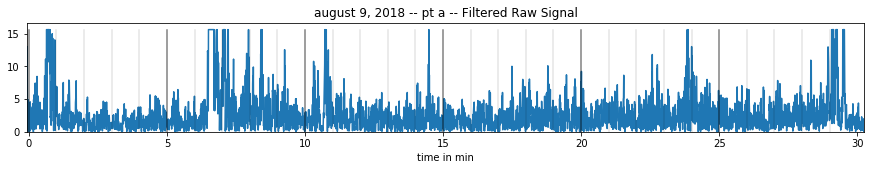

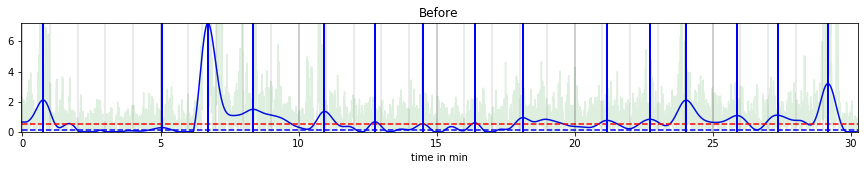

Filtering on spacing and magnitude
Initial:
uc @  0.7   0.4- 1.1   width:   41 mag: 2.11
uc @  5.0   4.6- 5.4   width:   46 mag: 0.28
uc @  6.7   6.4- 7.1   width:   39 mag: 7.21
uc @  8.4   6.3- 9.6   width:  198 mag: 1.49
uc @ 10.9  10.6-11.3   width:   42 mag: 1.35
uc @ 12.8  12.5-13.0   width:   29 mag: 0.66
uc @ 14.5  14.2-14.7   width:   33 mag: 0.52
uc @ 16.4  16.1-16.6   width:   28 mag: 0.60
uc @ 18.1  17.8-19.7   width:  112 mag: 0.94
uc @ 21.2  20.7-21.7   width:   58 mag: 0.76
uc @ 22.7  22.3-23.3   width:   61 mag: 0.83
uc @ 24.0  23.6-24.5   width:   53 mag: 2.10
uc @ 25.9  23.5-26.3   width:  170 mag: 1.08
uc @ 27.4  26.9-28.4   width:   90 mag: 1.10
uc @ 29.2  28.8-29.5   width:   38 mag: 3.20

    sustained uc @ 18.1m  width: 112 sec

Final:
uc @  0.7   0.4- 1.1   width:   41 mag: 2.11
uc @  6.7   6.4- 7.1   width:   39 mag: 7.21
uc @ 10.9  10.6-11.3   width:   42 mag: 1.35
uc @ 18.1  17.8-19.7   width:  112 mag: 0.94
uc @ 21.2  20.7-21.7   width:   58 mag: 0.76
uc @ 2

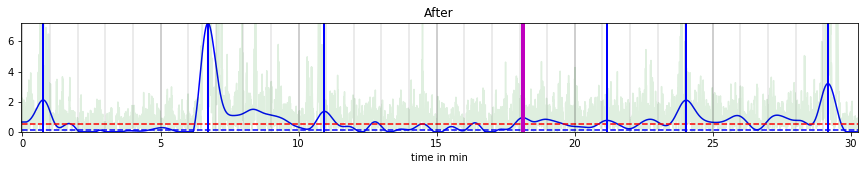

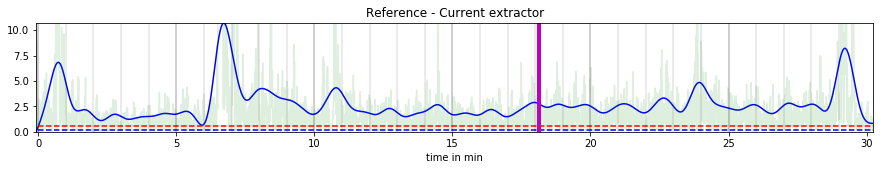


****************************************

----------------------------------------
august 8, 2018 -- pt c :
57ba7581-81d0-4601-b884-9139fcd98890/3cef2dd2-96af-4af4-a816-7cd92841a880.p
['pos', 'raw', 'uc', 'filtered', 'posMin', 'alt_uc']


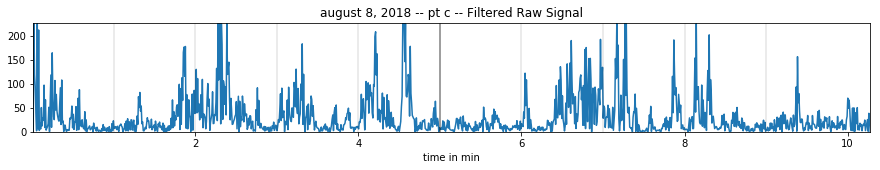

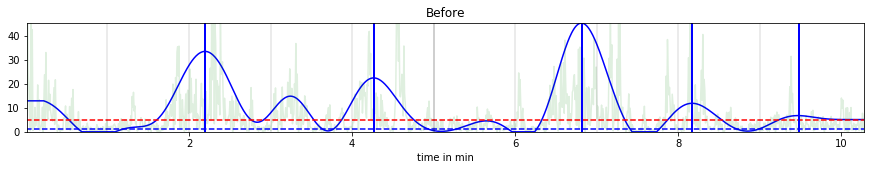

Filtering on spacing and magnitude
Initial:
uc @  2.2   1.8- 2.6   width:   43 mag: 33.49
uc @  4.3   4.0- 4.6   width:   37 mag: 22.44
uc @  6.8   6.5- 7.2   width:   39 mag: 45.27
uc @  8.2   7.9- 8.5   width:   36 mag: 11.87
uc @  9.5   9.1-10.3   width:   68 mag: 6.75


Final:
uc @  2.2   1.8- 2.6   width:   43 mag: 33.49
uc @  4.3   4.0- 4.6   width:   37 mag: 22.44
uc @  6.8   6.5- 7.2   width:   39 mag: 45.27
uc @  8.2   7.9- 8.5   width:   36 mag: 11.87
uc @  9.5   9.1-10.3   width:   68 mag: 6.75



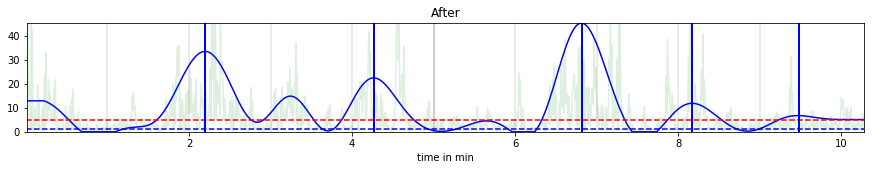

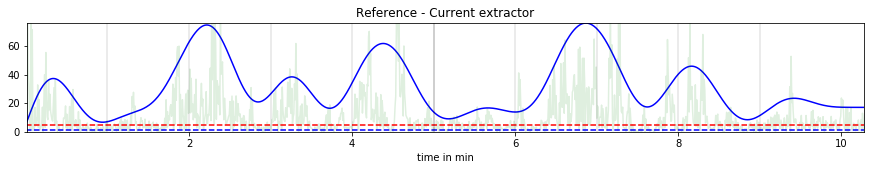


****************************************

----------------------------------------
august 15, 2018 -- pt a :
091a24e2-e069-4b01-a11c-e534c8cd29ab/c74e5801-59dc-4a38-b86f-fcb603f2a04f.p
['pos', 'raw', 'uc', 'filtered', 'posMin', 'alt_uc']


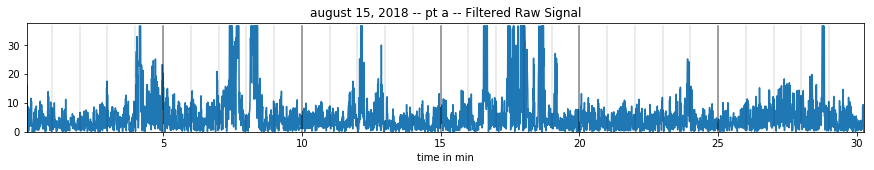

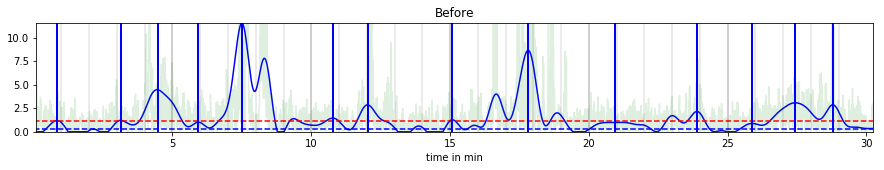

Filtering on spacing and magnitude
Initial:
uc @  0.8   0.5- 1.1   width:   35 mag: 1.19
uc @  3.1   2.9- 5.5   width:  159 mag: 1.21
uc @  4.5   4.0- 5.2   width:   70 mag: 4.46
uc @  5.9   2.8- 6.2   width:  204 mag: 1.03
uc @  7.5   7.2- 7.8   width:   40 mag: 11.53
uc @ 10.8  10.2-11.1   width:   53 mag: 1.45
uc @ 12.0  11.7-12.5   width:   47 mag: 2.86
uc @ 15.1  14.9-15.3   width:   29 mag: 1.28
uc @ 17.8  17.4-18.1   width:   42 mag: 8.64
uc @ 20.9  20.1-22.2   width:  122 mag: 0.99
uc @ 23.9  23.5-24.2   width:   40 mag: 2.15
uc @ 25.9  25.5-29.8   width:  256 mag: 0.89
uc @ 27.4  26.6-28.2   width:   91 mag: 3.08
uc @ 28.8  28.4-29.1   width:   44 mag: 2.86

    sustained uc @ 27.4m  width: 91 sec

Final:
uc @  4.5   4.0- 5.2   width:   70 mag: 4.46
uc @  7.5   7.2- 7.8   width:   40 mag: 11.53
uc @ 10.8  10.2-11.1   width:   53 mag: 1.45
uc @ 12.0  11.7-12.5   width:   47 mag: 2.86
uc @ 17.8  17.4-18.1   width:   42 mag: 8.64
uc @ 23.9  23.5-24.2   width:   40 mag: 2.15
uc @ 

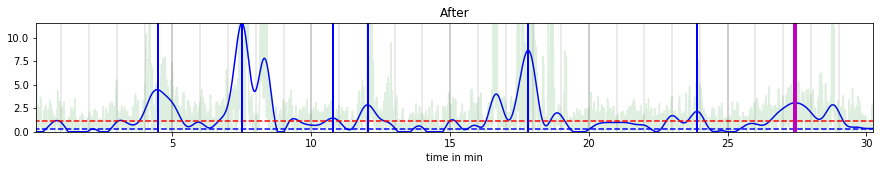

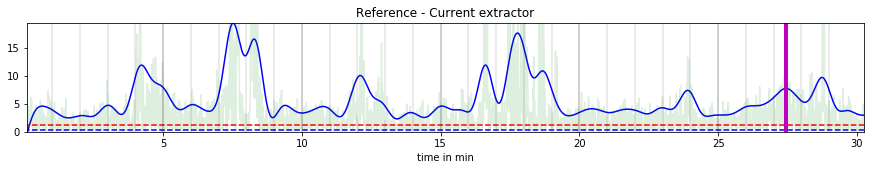


****************************************



In [11]:
showAllContractions(SelectedRecordings, path,
                    # UC Filter Params
                    squelchFactor=4, 
                    squelchPercentile=20,
                    minThresh=None, 
                    minWidth=35, 
                    maxWidth=60*1.3,    # sustained contraction
                    
                    # UC Extractor params
                    useAltExtractor=True,
                    altParams={'pct':40, 
                               'width':25, 
                               'freq':1.0/50},
                    verbose=False)